IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

IMPORT DATA

In [2]:
df = pd.read_csv("Amazon Sale Report.csv")
df = df.drop("Unnamed: 22", axis= 1)
df = df.drop("fulfilled-by", axis= 1)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19192\3737612786.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False


GET TOTAL CANCELLED ORDER

In [3]:
cancelled_count = df[df['Status'] == 'Cancelled'].shape[0]

total_count = len(df)

cancelled_percentage = (cancelled_count / total_count) * 100

print(f"Total Cancelled Orders: {cancelled_count}")
print(f"Percentage of Cancelled Orders: {cancelled_percentage:.2f}%")


Total Cancelled Orders: 18332
Percentage of Cancelled Orders: 14.21%


Pre-processing

In [4]:
print('Number of Duplicated Rows in the dataset:', df.duplicated().sum())

Number of Duplicated Rows in the dataset: 0


FINDING MISSING VALUES

In [5]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
dtype: int64

FILL MISSING VALUE

In [6]:
df['Courier Status'].fillna('Unknown',inplace=True)
df['promotion-ids'].fillna('No promotion',inplace=True)
df['ship-city'].fillna('Unknown',inplace=True)
df['ship-state'].fillna('Unknown',inplace=True)
df['ship-postal-code'].fillna('Unknown',inplace=True)
df['ship-country'].fillna('Unknown',inplace=True)

df['currency'].fillna(0,inplace=True)
df['Amount'].fillna(0,inplace=True)

df['ship-state'] = df['ship-state'].str.lower()
df['ship-city'] = df['ship-city'].str.lower()

#CHECK MISSING VALUE
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
dtype: int64

CHANGE STATUS FROM MANY SHIPPED TO 'SHIPPED'



so there's only two status

In [7]:
df['Status'] = df['Status'].apply(lambda x: x if x == 'Cancelled' else 'Shipped')

In [8]:
# Mengonversi ke format datetime yang standar
df['Date'] = pd.to_datetime(df['Date'])
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Unknown,0,INR,647.62,mumbai,maharashtra,400081.0,IN,No promotion,False
1,1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.00,bengaluru,karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.00,navi mumbai,maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Unknown,0,INR,753.33,puducherry,puducherry,605008.0,IN,No promotion,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.00,chennai,tamil nadu,600073.0,IN,No promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,Shipped,1,INR,517.00,hyderabad,telangana,500013.0,IN,No promotion,False
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,Shipped,1,INR,999.00,gurugram,haryana,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,Shipped,1,INR,690.00,hyderabad,telangana,500049.0,IN,No promotion,False
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,Shipped,1,INR,1199.00,halol,gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


STATUS PERCETAGE BY SHIP-STATE

Status                   Cancelled     Shipped
ship-state                                    
andaman & nicobar        17.509728   82.490272
andhra pradesh           16.427256   83.572744
apo                     100.000000    0.000000
ar                        0.000000  100.000000
arunachal pradesh        13.698630   86.301370
assam                    14.912808   85.087192
bihar                    16.130558   83.869442
chandigarh               10.810811   89.189189
chhattisgarh             13.861386   86.138614
dadra and nagar          17.142857   82.857143
delhi                    13.047223   86.952777
goa                      11.433597   88.566403
gujarat                  13.165516   86.834484
haryana                  12.751982   87.248018
himachal pradesh         18.527919   81.472081
jammu & kashmir          16.951567   83.048433
jharkhand                15.865385   84.134615
karnataka                12.957405   87.042595
kerala                   17.843584   82.156416
ladakh       

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19192\1688525914.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(statusrate_percentage.columns))


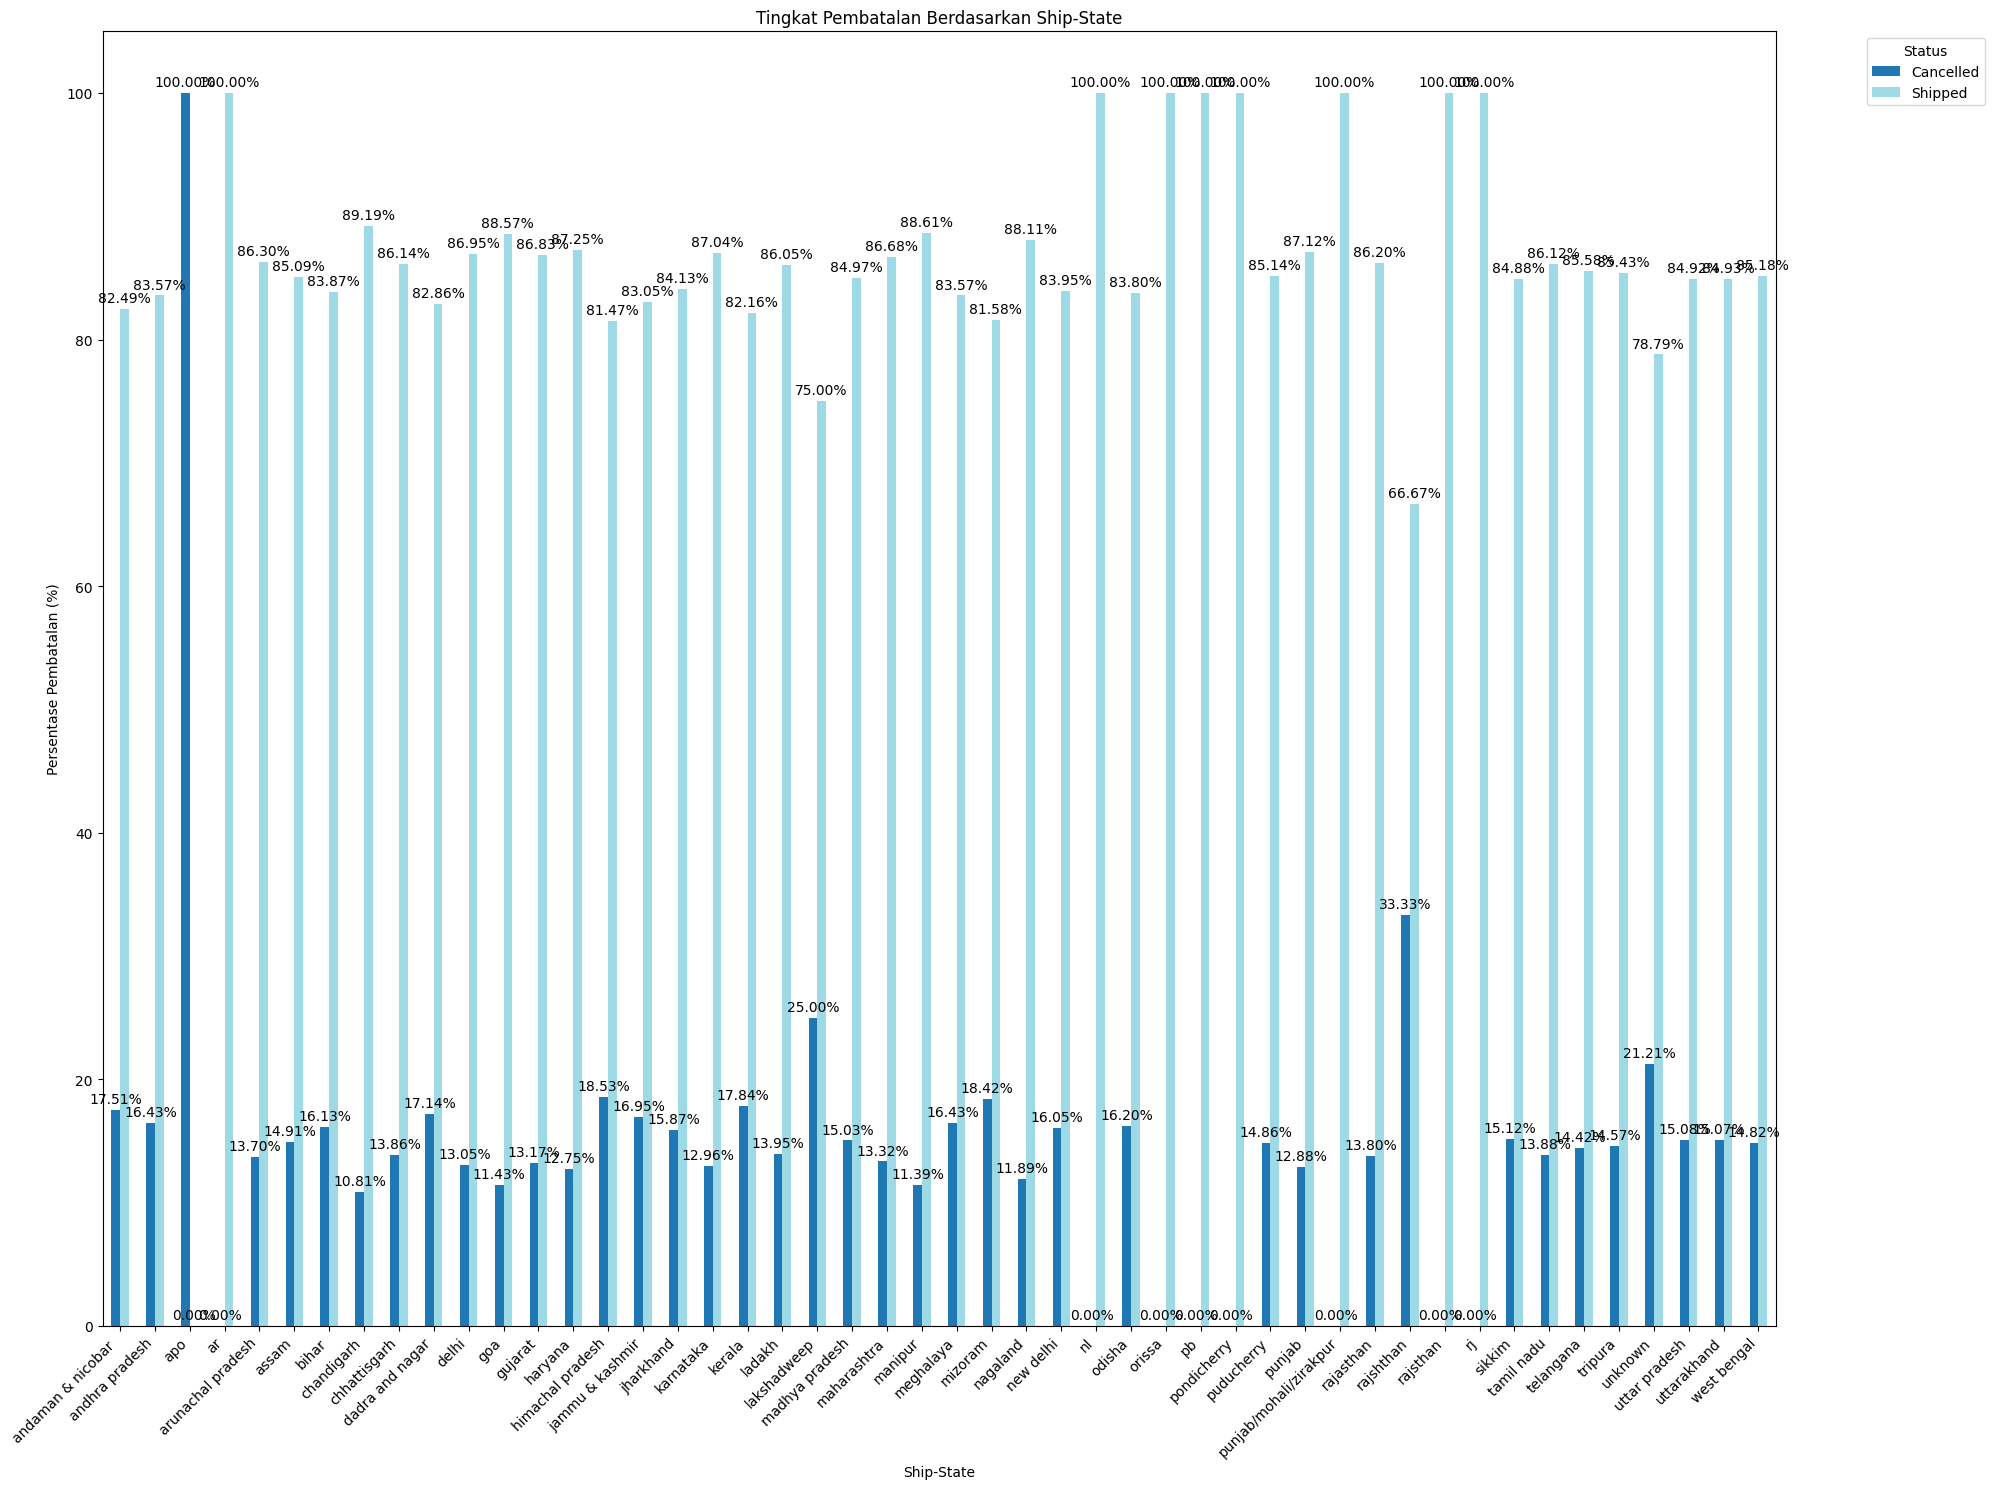

In [9]:
status_rate = df.groupby(['ship-state', 'Status']).size().unstack(fill_value=0)

# Menghitung persentase untuk setiap status
statusrate_percentage = status_rate.div(status_rate.sum(axis=1), axis=0) * 100

# Print hasil persentase per status untuk setiap Fulfillment
print(statusrate_percentage)

# Plot dengan ukuran figure yang disesuaikan
fig, ax = plt.subplots(figsize=(20, 15))  # Menyesuaikan ukuran untuk fleksibilitas

# Menggunakan palet warna untuk memudahkan perbedaan kategori
colors = plt.cm.get_cmap('tab20', len(statusrate_percentage.columns))

# Visualisasi dengan bar chart
statusrate_percentage.plot(kind='bar', ax=ax, color=colors(range(len(statusrate_percentage.columns))),
                                        title='Tingkat Pembatalan Berdasarkan Ship-State')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label sumbu
plt.ylabel('Persentase Pembatalan (%)')
plt.xlabel('Ship-State')

# Memutar label di sumbu X untuk menghindari overlap
plt.xticks(rotation=45, ha='right')

# Menambahkan legenda di luar plot agar lebih terlihat jika data banyak
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mengatur tata letak agar lebih rapi
plt.tight_layout()

# Menampilkan grafik
plt.show()

CREATE DAY FROM DATE

In [10]:
# Menambahkan kolom 'Day' dengan nama hari
df['Day'] = df['Date'].dt.day_name()
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Day
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,mumbai,maharashtra,400081.0,IN,No promotion,False,Saturday
1,1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,bengaluru,karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Saturday
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,navi mumbai,maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Saturday
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,puducherry,puducherry,605008.0,IN,No promotion,False,Saturday
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,chennai,tamil nadu,600073.0,IN,No promotion,False,Saturday


PERCENTAGE OF STATUS BY DAY

Status     Cancelled    Shipped
Day                            
Monday      2.086451  12.310138
Tuesday     2.102733  12.538089
Wednesday   2.025974  12.390773
Thursday    1.874007  11.360341
Friday      1.978678  11.758868
Saturday    2.051560  12.310913
Sunday      2.094204  13.117271


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19192\3101876268.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(statusrate_percentage_total.columns))


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

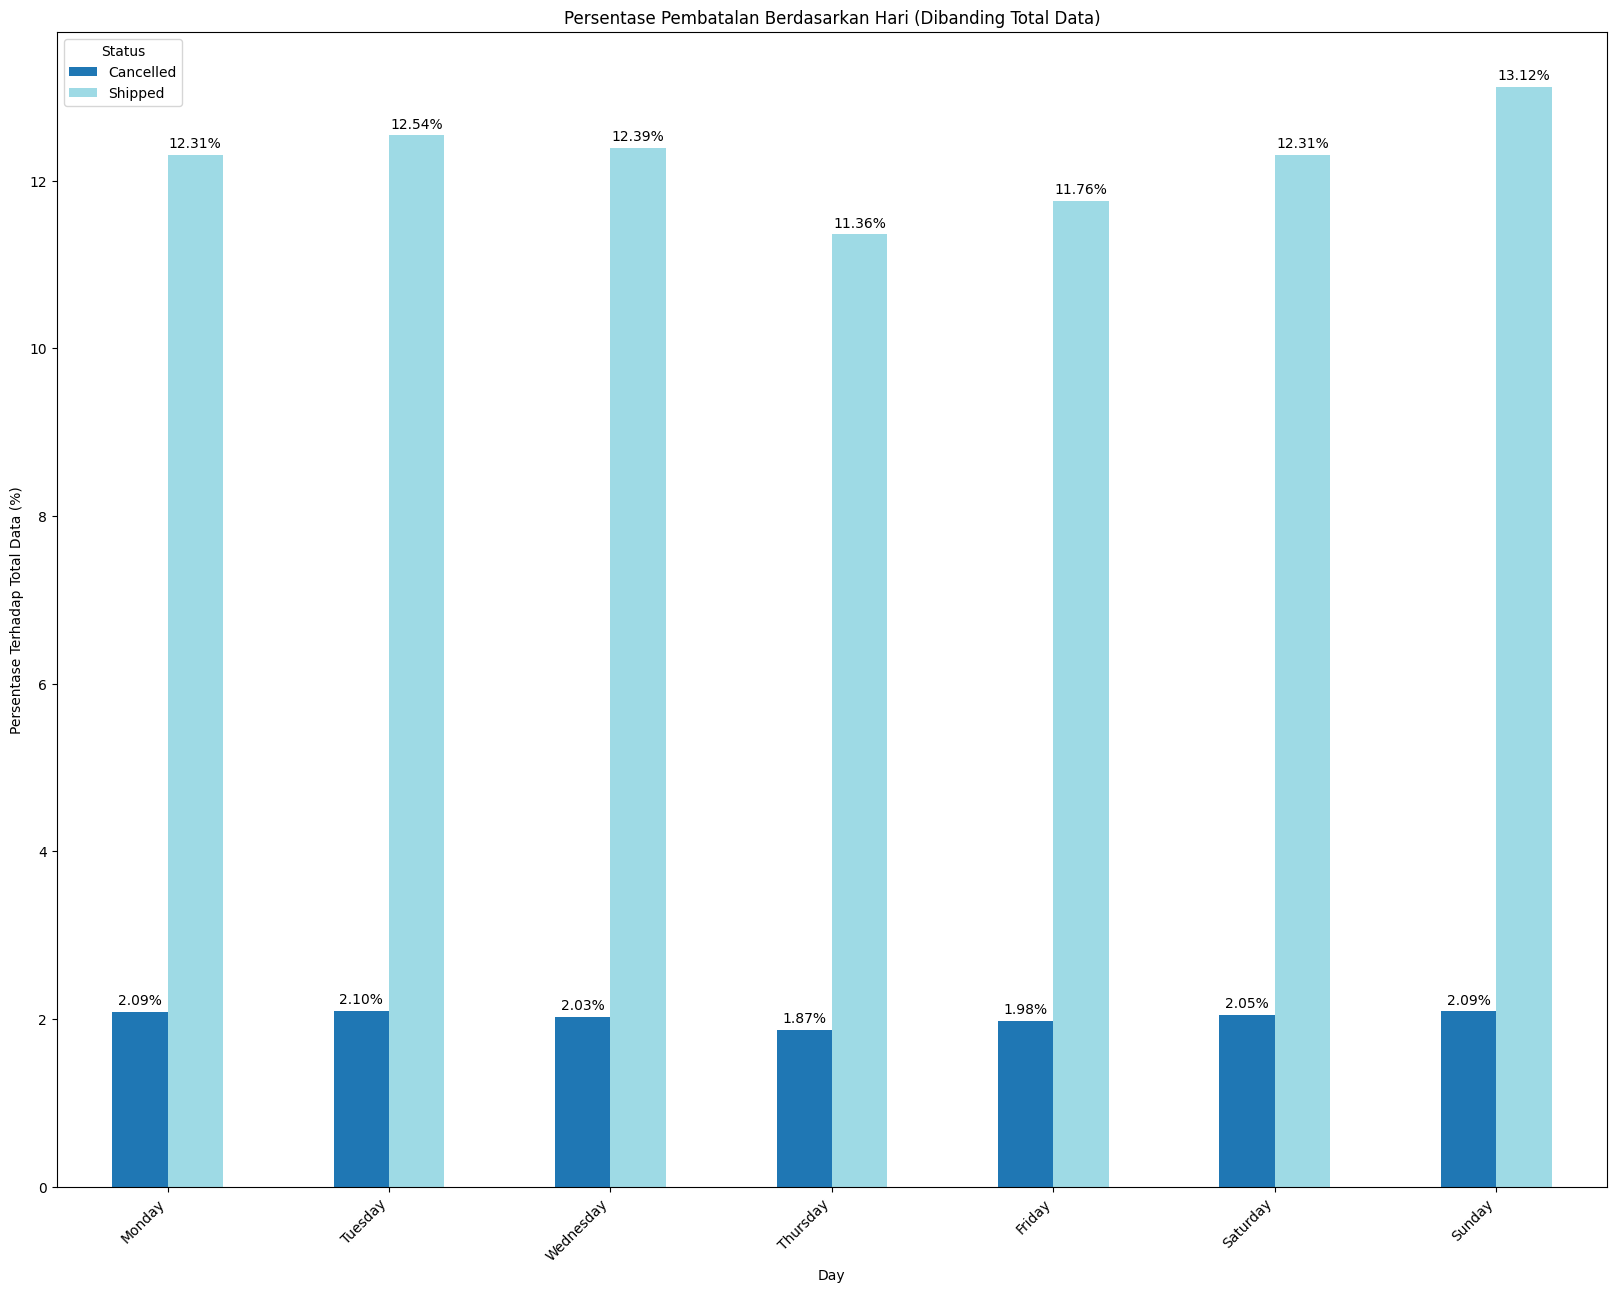

In [21]:
# Tentukan urutan hari
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ubah kolom 'Day' menjadi kategori dengan urutan yang ditentukan
df['Day'] = pd.Categorical(df['Day'], categories=days_order, ordered=True)

# Mengelompokkan data dan menghitung jumlah setiap status per hari
status_rate = df.groupby(['Day', 'Status']).size().unstack(fill_value=0)

# Menghitung total data secara keseluruhan
total_data = status_rate.sum().sum()

# Menghitung persentase per hari dibandingkan total data
statusrate_percentage_total = status_rate.div(total_data) * 100

# Print hasil persentase per status untuk setiap hari dibandingkan dengan total data
print(statusrate_percentage_total)

# Plot dengan ukuran figure yang disesuaikan
fig, ax = plt.subplots(figsize=(20, 15))  # Menyesuaikan ukuran untuk fleksibilitas

# Menggunakan palet warna untuk memudahkan perbedaan kategori
colors = plt.cm.get_cmap('tab20', len(statusrate_percentage_total.columns))

# Visualisasi dengan bar chart
statusrate_percentage_total.plot(kind='bar', ax=ax, color=colors(range(len(statusrate_percentage_total.columns))),
                                 title='Persentase Pembatalan Berdasarkan Hari (Dibanding Total Data)')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label sumbu
plt.ylabel('Persentase Terhadap Total Data (%)')
plt.xlabel('Day')

# Memutar label di sumbu X untuk menghindari overlap
plt.xticks(rotation=45, ha='right')

# Menambahkan legenda


In [25]:
# Menambahkan kolom 'Day' dengan nama hari
df['Month'] = df['Date'].dt.month_name()
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Day,Month,Dollars ($)
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,mumbai,maharashtra,400081.0,IN,No promotion,False,Saturday,April,7.712608
1,1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,bengaluru,karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Saturday,April,4.835117
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,navi mumbai,maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Saturday,April,3.918112
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,puducherry,puducherry,605008.0,IN,No promotion,False,Saturday,April,8.971524
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,chennai,tamil nadu,600073.0,IN,No promotion,False,Saturday,April,6.835856


Status     Cancelled    Shipped
Month                          
January     0.000000   0.000000
February    0.000000   0.000000
March       0.013956   0.118628
April       5.533631  32.510176
May         4.554371  28.041093
June        4.111650  25.116495
July        0.000000   0.000000
August      0.000000   0.000000
September   0.000000   0.000000
November    0.000000   0.000000
December    0.000000   0.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19192\2963393900.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(statusrate_percentage_total.columns))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'November'),
  Text(10, 0, 'December')])

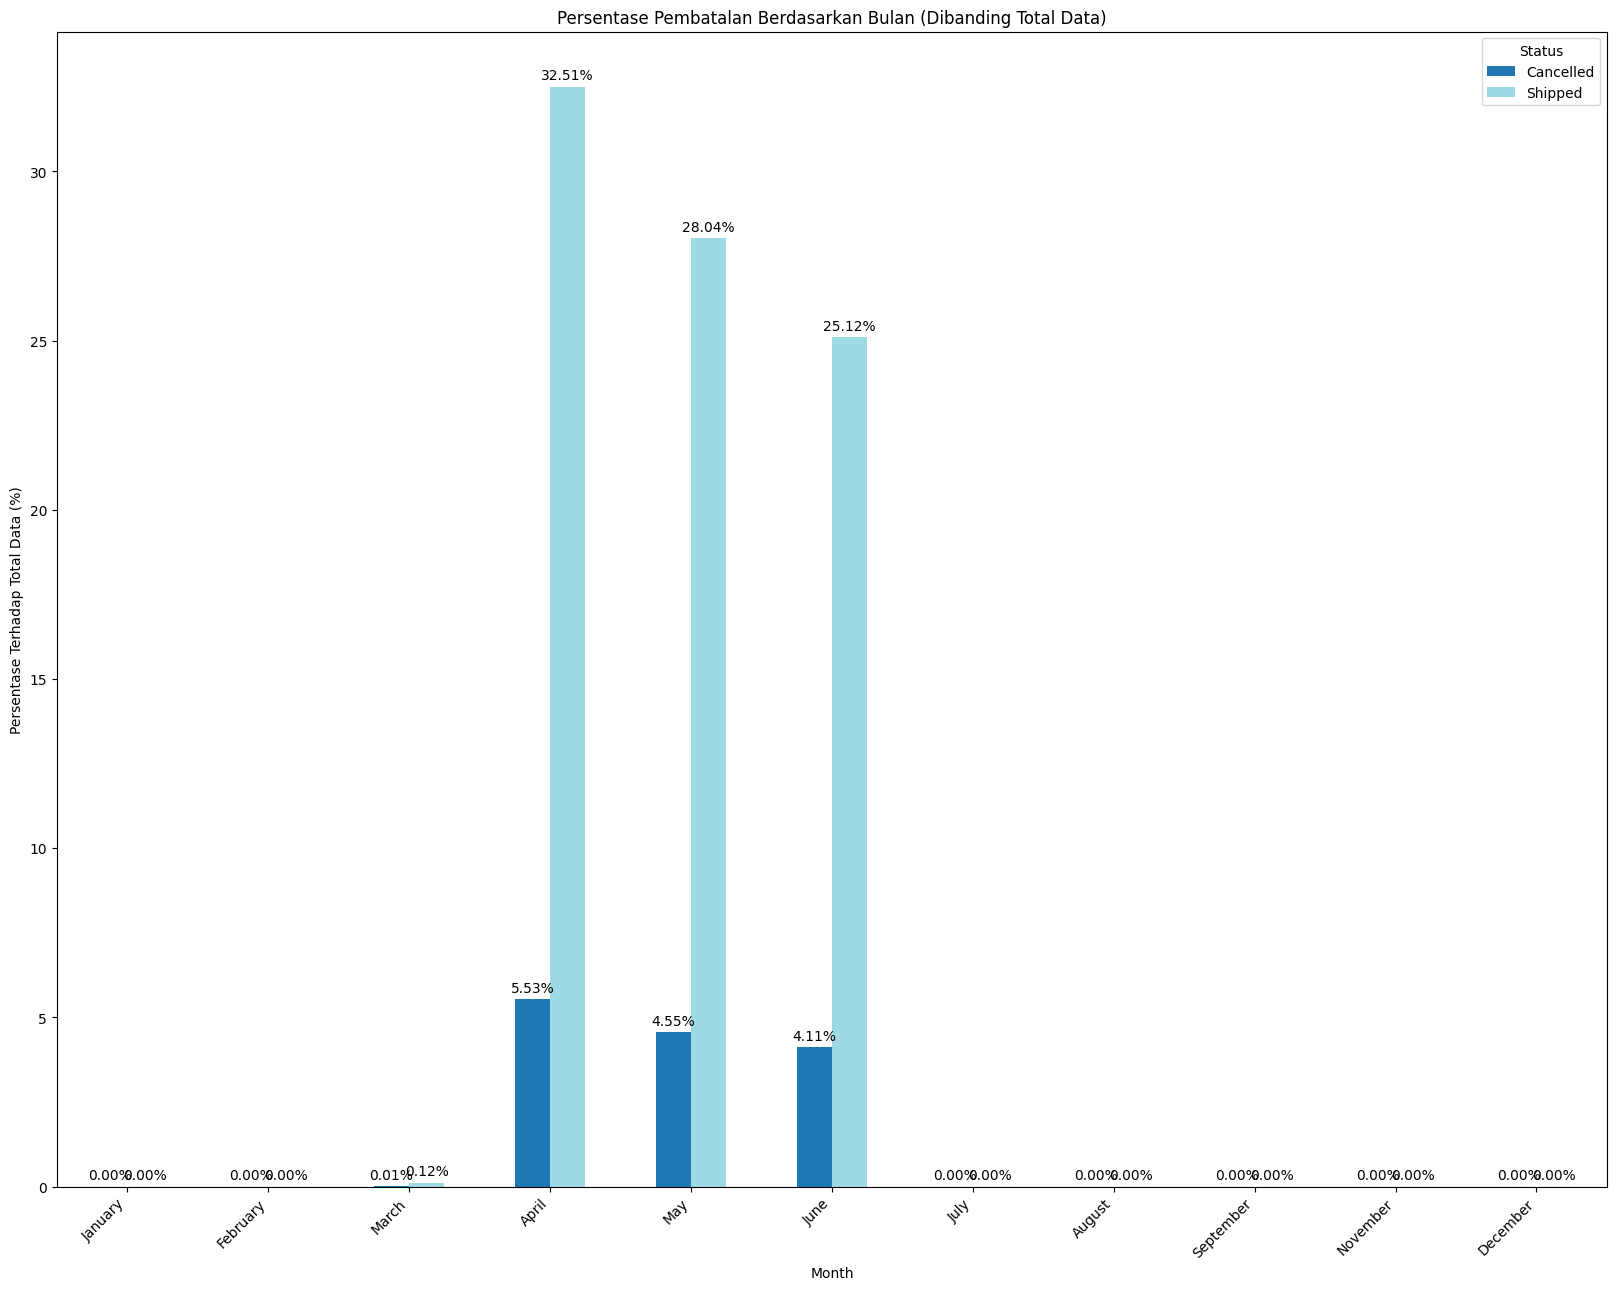

In [26]:
# Tentukan urutan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']

# Ubah kolom 'Day' menjadi kategori dengan urutan yang ditentukan
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Mengelompokkan data dan menghitung jumlah setiap status per hari
status_rate = df.groupby(['Month', 'Status']).size().unstack(fill_value=0)

# Menghitung total data secara keseluruhan
total_data = status_rate.sum().sum()

# Menghitung persentase per hari dibandingkan total data
statusrate_percentage_total = status_rate.div(total_data) * 100

# Print hasil persentase per status untuk setiap hari dibandingkan dengan total data
print(statusrate_percentage_total)

# Plot dengan ukuran figure yang disesuaikan
fig, ax = plt.subplots(figsize=(20, 15))  # Menyesuaikan ukuran untuk fleksibilitas

# Menggunakan palet warna untuk memudahkan perbedaan kategori
colors = plt.cm.get_cmap('tab20', len(statusrate_percentage_total.columns))

# Visualisasi dengan bar chart
statusrate_percentage_total.plot(kind='bar', ax=ax, color=colors(range(len(statusrate_percentage_total.columns))),
                                 title='Persentase Pembatalan Berdasarkan Bulan (Dibanding Total Data)')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                xytext=(0, 5), textcoords='offset points')

# Menambahkan label sumbu
plt.ylabel('Persentase Terhadap Total Data (%)')
plt.xlabel('Month')

# Memutar label di sumbu X untuk menghindari overlap
plt.xticks(rotation=45, ha='right')

# Menambahkan legenda


SUM OF TOTAL SALES BY CATEGORY WITH ALL STATUS AND SHIPPED ONLY

Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64


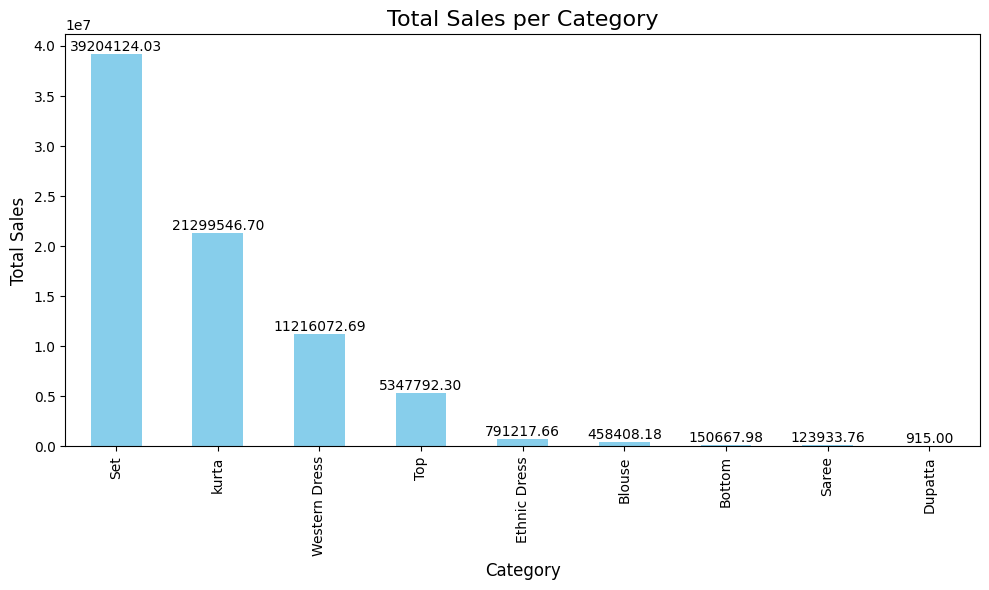

In [27]:
# Mengelompokkan berdasarkan kategori dan menjumlahkan amount untuk setiap kategori
total_sales_per_category = df.groupby('Category')['Amount'].sum()

# Mengurutkan dari terbesar ke terkecil
sorted_sales = total_sales_per_category.sort_values(ascending=False)
print(sorted_sales)

# Plotting
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran figure
sorted_sales.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Total Sales per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Menampilkan nilai di atas bar
for i in range(len(sorted_sales)):
    plt.text(i, sorted_sales[i] + 5, f'{sorted_sales[i]:.2f}', ha='center', va='bottom')

# Menampilkan chart
plt.tight_layout()
plt.show()

Category
Set              35731673.0
kurta            19425870.0
Western Dress    10209590.0
Top               4904066.0
Ethnic Dress       732744.0
Blouse             418389.0
Bottom             135453.0
Saree              114694.0
Dupatta               915.0
Name: Amount, dtype: float64


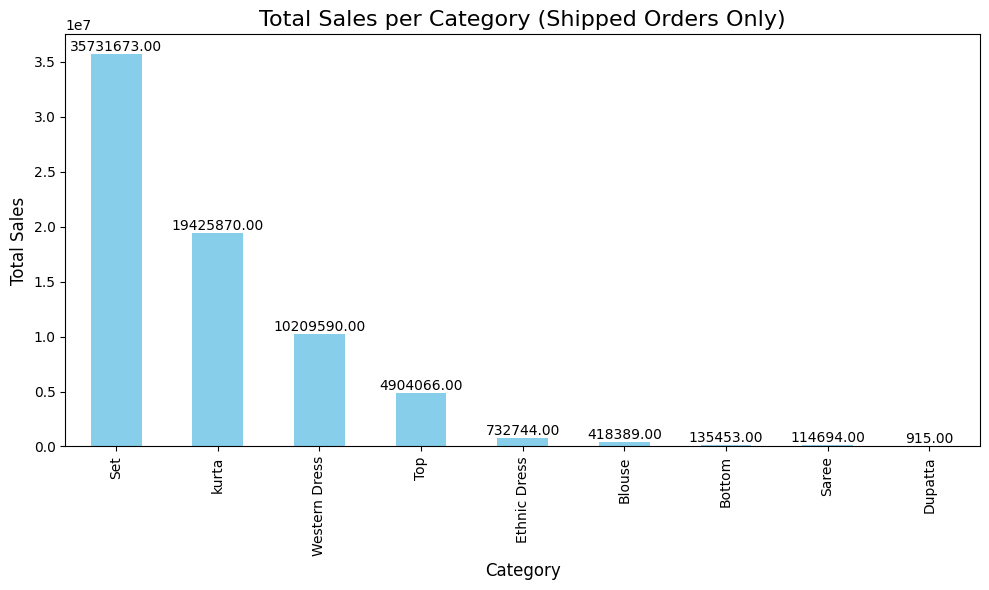

In [15]:
# Filter hanya untuk order yang berstatus 'shipped'
shipped_orders = df[df['Status'] == 'Shipped']

# Mengelompokkan berdasarkan kategori dan menjumlahkan amount untuk setiap kategori
total_sales_per_category = shipped_orders.groupby('Category')['Amount'].sum()

# Mengurutkan dari terbesar ke terkecil
sorted_sales = total_sales_per_category.sort_values(ascending=False)
print(sorted_sales)

# Plotting
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran figure
sorted_sales.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Total Sales per Category (Shipped Orders Only)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Menampilkan nilai di atas bar
for i in range(len(sorted_sales)):
    plt.text(i, sorted_sales[i] + 5, f'{sorted_sales[i]:.2f}', ha='center', va='bottom')

# Menampilkan chart
plt.tight_layout()
plt.show()

EXCHANGE INR TO USD

In [16]:
exchange_rate = 0.011909156
df['Dollars ($)'] = df['Amount'].apply(lambda x: x * exchange_rate)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Day,Month,Dollars ($)
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,mumbai,maharashtra,400081.0,IN,No promotion,False,Saturday,April,7.712608
1,1,171-9198151-1101146,2022-04-30,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,bengaluru,karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Saturday,April,4.835117
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,navi mumbai,maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Saturday,April,3.918112
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,puducherry,puducherry,605008.0,IN,No promotion,False,Saturday,April,8.971524
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,chennai,tamil nadu,600073.0,IN,No promotion,False,Saturday,April,6.835856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,517.00,hyderabad,telangana,500013.0,IN,No promotion,False,Tuesday,May,6.157034
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,999.00,gurugram,haryana,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Tuesday,May,11.897247
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,690.00,hyderabad,telangana,500049.0,IN,No promotion,False,Tuesday,May,8.217318
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1199.00,halol,gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Tuesday,May,14.279078


SUM USING USD

Month
January           0.000000
February          0.000000
March          1210.968832
April        343444.676221
May          312335.202946
June         278981.618333
July              0.000000
August            0.000000
September         0.000000
November          0.000000
December          0.000000
Name: Dollars ($), dtype: float64


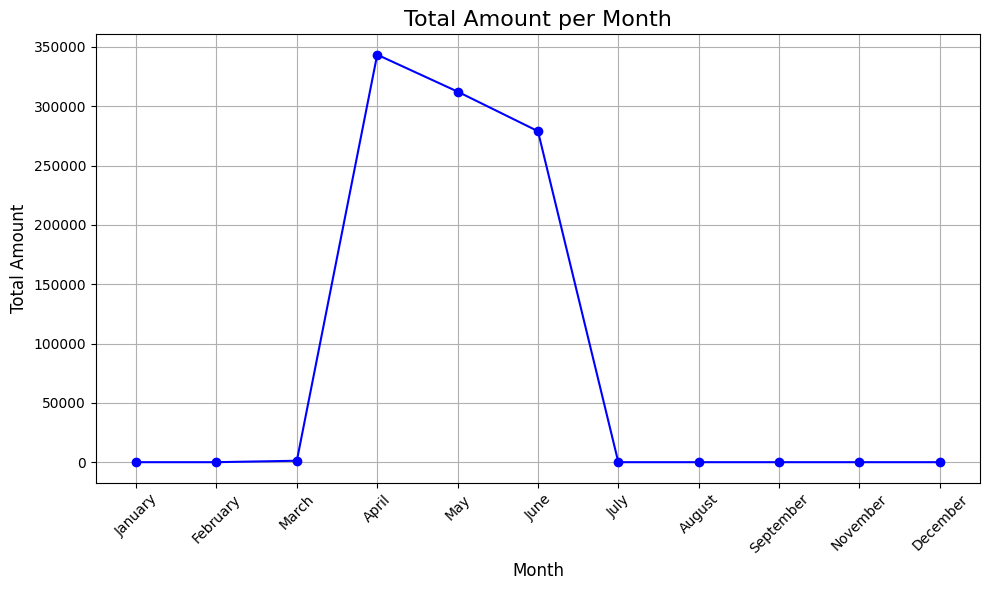

In [17]:
# Tentukan urutan hari
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'December']

# Ubah kolom 'Day' menjadi kategori dengan urutan yang ditentukan
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)


total_amount_per_month = df.groupby('Month')['Dollars ($)'].sum()
print(total_amount_per_month)

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(total_amount_per_month.index.astype(str), total_amount_per_month.values, marker='o', linestyle='-', color='b')

# Menambahkan judul dan label sumbu
plt.title('Total Amount per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)

# Menambahkan grid untuk kemudahan visualisasi
plt.grid(True)

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

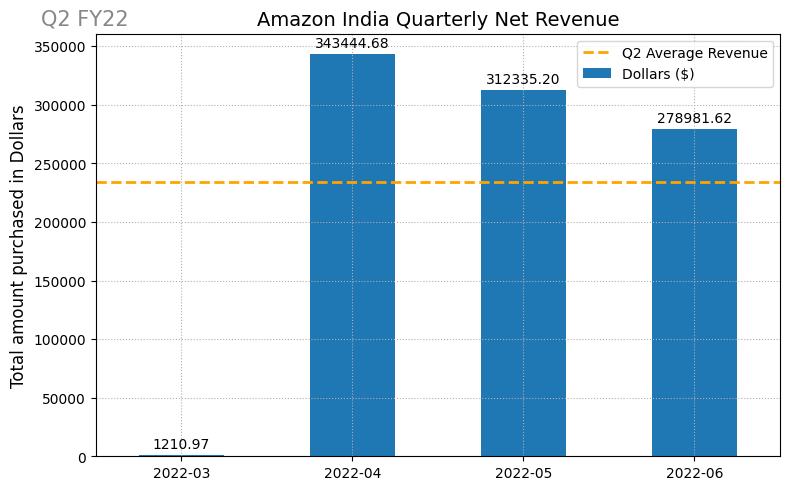

In [29]:
# Menghitung total amount per bulan seperti sebelumnya
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
total_amount_per_month = df.groupby('Month')['Dollars ($)'].sum()

# Jika 'Dollars ($)' tidak ada, pastikan menggunakan kolom yang sesuai
avg_quarterly_revenue = total_amount_per_month.mean()  # Menggunakan mean dari total amount
monthly_sales = total_amount_per_month.reset_index(drop=False)  # Reset index

# Plot bar chart dengan total penjualan per bulan
fig, ax = plt.subplots(figsize=(8, 5))  # Sesuaikan ukuran chart
monthly_sales.plot(ax=ax, x='Month', y='Dollars ($)', kind='bar', legend=False)

# Menambahkan label di atas setiap bar
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}',  # Format dengan dua angka desimal
                (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='baseline', 
                xytext=(0, 5), textcoords='offset points')  # Jarak antara label dan bar

# Memformat dan menambahkan informasi
plt.xticks(rotation=0)
plt.title('Amazon India Quarterly Net Revenue', size=14)
plt.text(-.08, 1.02, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
plt.xlabel("", fontsize=12)
plt.ylabel("Total amount purchased in Dollars", fontsize=12)

# Menambahkan grid dan garis rata-rata
plt.grid(linestyle=':')
plt.axhline(avg_quarterly_revenue, linestyle='--', color='orange', linewidth=2, label='Q2 Average Revenue')

# Memastikan tata letak rapi
plt.tight_layout()
plt.legend()
plt.show()


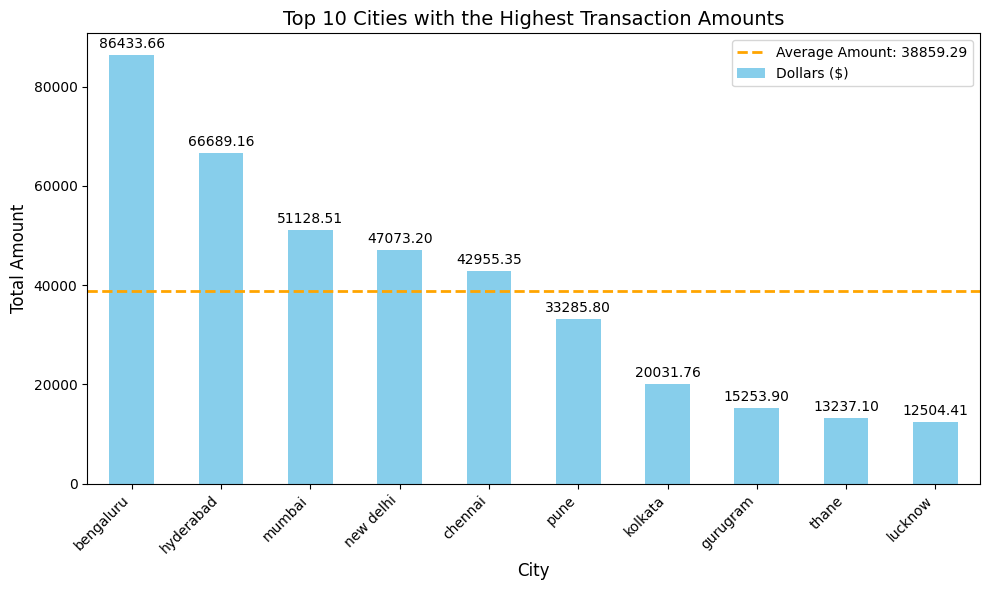

In [30]:
top_cities = df.groupby('ship-city')['Dollars ($)'].sum().sort_values(ascending=False)
# Mengambil 10 kota dengan jumlah transaksi terbesar
top_10_cities = top_cities.head(10)

# Menghitung rata-rata total 'amount'
average_amount = top_10_cities.mean()

# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(10, 6))
ax = top_10_cities.plot(kind='bar', color='skyblue')

# Menambahkan garis rata-rata
plt.axhline(average_amount, color='orange', linestyle='--', linewidth=2, label=f'Average Amount: {average_amount:.2f}')

# Menambahkan label di atas setiap bar
for i in ax.patches:
    ax.annotate(f'{i.get_height():.2f}', 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha='center', va='baseline', 
                xytext=(0, 5), textcoords='offset points')  # Menambah jarak label dari bar

# Menambahkan judul dan label sumbu
plt.title('Top 10 Cities with the Highest Transaction Amounts', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)

# Menambahkan legenda untuk garis rata-rata
plt.legend()

# Menampilkan chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Category
Set              425534.067898
kurta            231345.716266
Western Dress    121587.600006
Top               58403.287028
Ethnic Dress       8726.362604
Blouse             4982.659870
Bottom             1613.130908
Saree              1365.908738
Dupatta              10.896878
Name: Dollars ($), dtype: float64


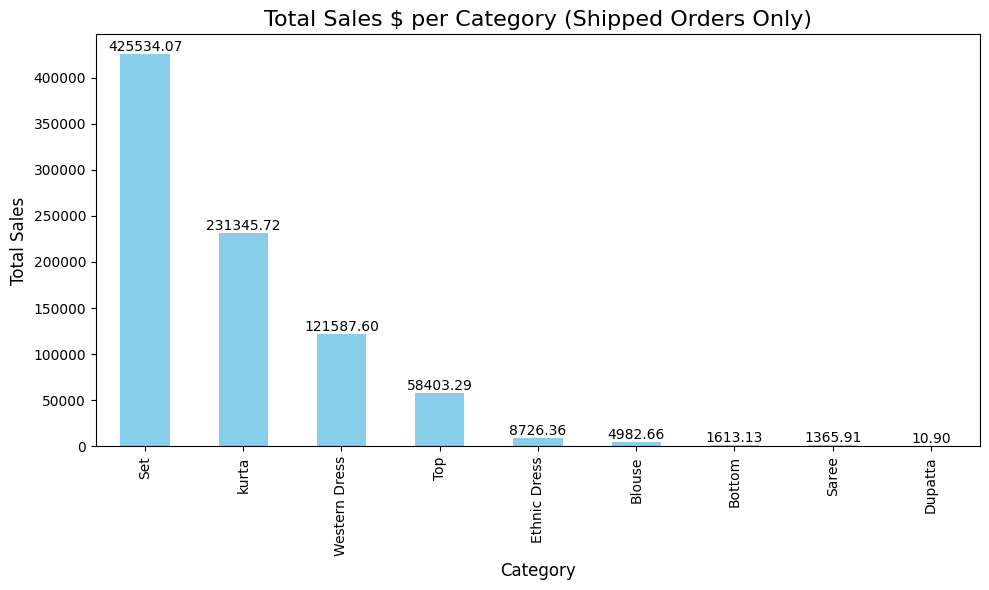

In [28]:
# Filter hanya untuk order yang berstatus 'shipped'
shipped_orders = df[df['Status'] == 'Shipped']

# Mengelompokkan berdasarkan kategori dan menjumlahkan amount untuk setiap kategori
total_sales_per_category = shipped_orders.groupby('Category')['Dollars ($)'].sum()

# Mengurutkan dari terbesar ke terkecil
sorted_sales = total_sales_per_category.sort_values(ascending=False)
print(sorted_sales)

# Plotting
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran figure
sorted_sales.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Total Sales $ per Category (Shipped Orders Only)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Menampilkan nilai di atas bar
for i in range(len(sorted_sales)):
    plt.text(i, sorted_sales[i] + 5, f'{sorted_sales[i]:.2f}', ha='center', va='bottom')

# Menampilkan chart
plt.tight_layout()
plt.show()

SAVED NEW DATA TO CSV

In [20]:
df.to_csv('Analysis_retail_amazon.csv', index=False)